In [1]:
import numpy as np
import geometry as mygeom 
from pointcloud import Pointcloud
import osm 
import geopandas as gpd
import matplotlib.pyplot as plt
from timer import Timer
from shapely import geometry

In [ ]:
URL = "https://tile.openstreetmap.org/{z}/{x}/{y}.png".format

In [2]:
# point parameter random points A
n_a = 100 # number of points
xmin_a = 0
xmax_a = 100
ymin_a = 0
ymax_a = 100

# point parameter random points B
n_b = 70 # number of points
xmin_b = 0
xmax_b = 100
ymin_b = 0
ymax_b = 100

In [3]:
pointcloud_a = Pointcloud.gen_random_points(n=n_a,xmin=xmin_a,xmax=xmax_a,ymin=ymin_a,ymax=ymax_a)

In [4]:
with Timer("Execution time closest pair:"):
    dist ,(pa,pb) = pointcloud_a.closest_pair()
print(f"Distance: {dist}\nPoints:\n{pa},{pb}")

Execution time closest pair: 1.719 [μs]
Distance: 1.5047389135760096
Points:
POINT (52.61440787333319 8.187521140029508),POINT (54.07155289257152 7.812064629979609)


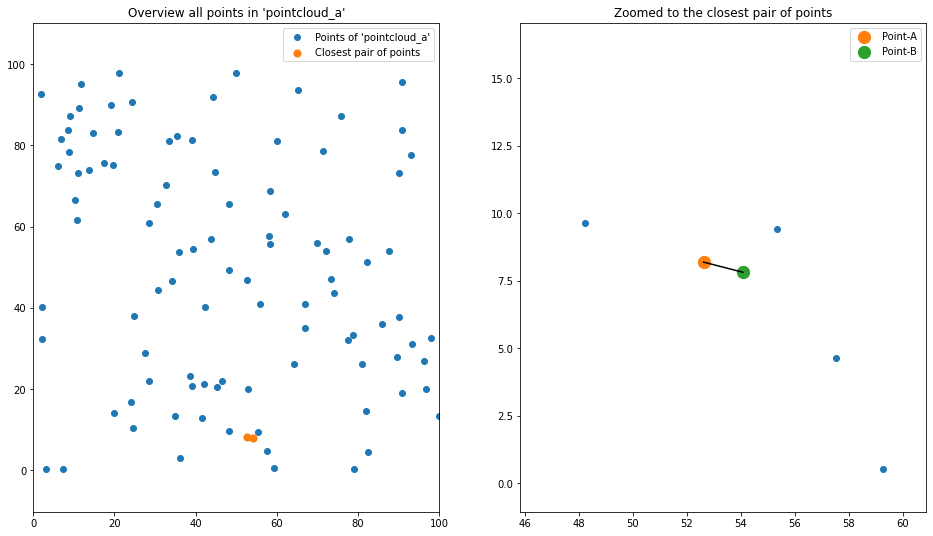

In [5]:
xx_a = pointcloud_a.as_array()[:,0]
yy_a = pointcloud_a.as_array()[:,1]

fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(16,9))
ax1.axis('equal')
ax2.axis('equal')
ax1.set_xlim(xmin_a,xmax_a)
ax1.set_ylim(ymin_a,ymax_a)
ax1.scatter(xx_a,yy_a, label="Points of 'pointcloud_a'")
ax1.scatter([pa.x,pb.x],[pa.y,pb.y],s=50, label="Closest pair of points")
ax1.set_title("Overview all points in 'pointcloud_a'")
ax1.legend()

center_x = (pa.x + pb.x)/2
center_y = (pa.y + pb.y)/2
# zoom is relative to the distance, in this case 5 times the distance
# of the closest pair
zoom = 5
(xmin,xmax) = (center_x - dist * zoom, center_x + dist * zoom)
(ymin,ymax) = (center_y - dist * zoom, center_y + dist * zoom)
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(ymin,ymax)
ax2.scatter(xx_a,yy_a)
ax2.plot([pa.x,pb.x],[pa.y,pb.y],c="black")
ax2.scatter([pa.x],[pa.y],label="Point-A",s=150)
ax2.scatter([pb.x],[pb.y], label="Point-B",s=150)
ax2.set_title("Zoomed to the closest pair of points")
ax2.legend()
plt.show()

In [6]:
pointcloud_b = Pointcloud.gen_random_points(n_b,xmin_b,xmax_b,ymin_b,ymax_b)
# kd tree approach
with Timer("Execution Time KD-Tree-Nearest-Neighbour:"):
    points_kdtree = pointcloud_a.k_nearest_neighbour_kdtree(pointcloud_b)
# brutal force approach
with Timer("Execution Time Brutal-Force-Nearest-Neighbour:"):
    points_bf = pointcloud_a.k_nearest_neighbour_bf(pointcloud_b)
assert points_kdtree == points_bf

Execution Time KD-Tree-Nearest-Neighbour: 11.181 [μs]
Execution Time Brutal-Force-Nearest-Neighbour: 16.995 [μs]


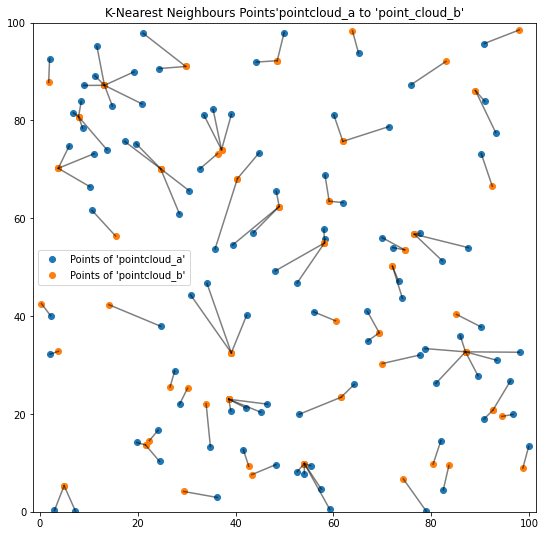

In [7]:
xx_b = [p.x for p in points_kdtree]
yy_b = [p.y for p in points_kdtree]

fig,ax = plt.subplots(ncols=1,figsize=(9,9))
ax.axis('equal')
ax.set_xlim(min(xmin_a,xmin_b),max(xmax_a,xmax_b))
ax.set_ylim(min(ymin_a,ymin_b),max(ymax_a,ymax_b))
ax.scatter(xx_a,yy_a, label="Points of 'pointcloud_a'")
ax.scatter(xx_b,yy_b, label="Points of 'pointcloud_b'")

for  pa,pb in zip(pointcloud_a.points,points_kdtree):
    plt.plot([pa.x,pb.x],[pa.y,pb.y],c="black",alpha=0.5)

ax.set_title("K-Nearest Neighbours Points'pointcloud_a to 'point_cloud_b'")
ax.legend()

In [8]:
bus_stop_gdf = osm.get_bus_stops("Graz")
building_gdf = osm.get_buildings("Graz")

In [9]:
bus_stop_gdf.head(2)

bus                 description   highway  \
element_type osmid                                                  
node         25703829   yes  Graz Hauptbahnhof, Steig C  bus_stop   
             265614336  yes                         NaN  bus_stop   

                              mapillary public_transport shelter survey:date  \
element_type osmid                                                             
node         25703829   292851579085476    stop_position     yes  2016-07-17   
             265614336              NaN         platform      no         NaN   

                       wheelchair                   geometry  \
element_type osmid                                             
node         25703829         yes  POINT (15.41758 47.07282)   
             265614336        NaN  POINT (15.41360 47.05539)   

                                  alt_name  ... highway:disused  \
element_type osmid                          ...                   
node         25703829                  NaN  ...             NaN   
             265614336  Graz Sterzinggasse  ...             NaN   

                       public_transport:disused construction opening_date  \
element_type osmid                                                          
node         25703829                       NaN          NaN          NaN   
             265614336                      NaN          NaN          NaN   

                       short_name network network:short network:wikidata  \
element_type osmid                                                         
node         25703829         NaN     NaN           NaN              NaN   
             265614336        NaN     NaN           NaN              NaN   

                       nodes area  
element_type osmid                 
node         25703829    NaN  NaN  
             265614336   NaN  NaN  

[2 rows x 71 columns]

In [10]:
building_gdf.head(2)

entrance                   geometry  source highway  \
element_type osmid                                                            
node         278296607       NaN  POINT (15.43086 47.06959)     NaN     NaN   
             1188213884      NaN  POINT (15.43728 47.06770)  survey     NaN   

                                                       name  ref  \
element_type osmid                                                 
node         278296607   Altkatholische Christophoruskirche  NaN   
             1188213884        Arbeitsmarktservice Graz Ost  NaN   

                                  amenity addr:city addr:country  \
element_type osmid                                                 
node         278296607   place_of_worship       NaN          NaN   
             1188213884               NaN      Graz           AT   

                        addr:housenumber  ... bridge ways air_conditioning  \
element_type osmid                        ...                                
node         278296607               NaN  ...    NaN  NaN              NaN   
             1188213884               46  ...    NaN  NaN              NaN   

                        ref:whc whc:criteria whc:inscription_date  \
element_type osmid                                                  
node         278296607      NaN          NaN                  NaN   
             1188213884     NaN          NaN                  NaN   

                        wikipedia:en name:it old_name_1 building_1  
element_type osmid                                                  
node         278296607           NaN     NaN        NaN        NaN  
             1188213884          NaN     NaN        NaN        NaN  

[2 rows x 594 columns]

In [11]:
bus_stop_gdf_new = bus_stop_gdf.reset_index()
building_gdf_new = building_gdf.reset_index()
bus_stop_gdf_new = bus_stop_gdf_new[bus_stop_gdf_new["element_type"] == "node"]
building_gdf_new = building_gdf_new[building_gdf_new["element_type"] != "node"]

Text(0.5, 1.0, 'Buildings in Graz downloaded from OpenStreetMap')

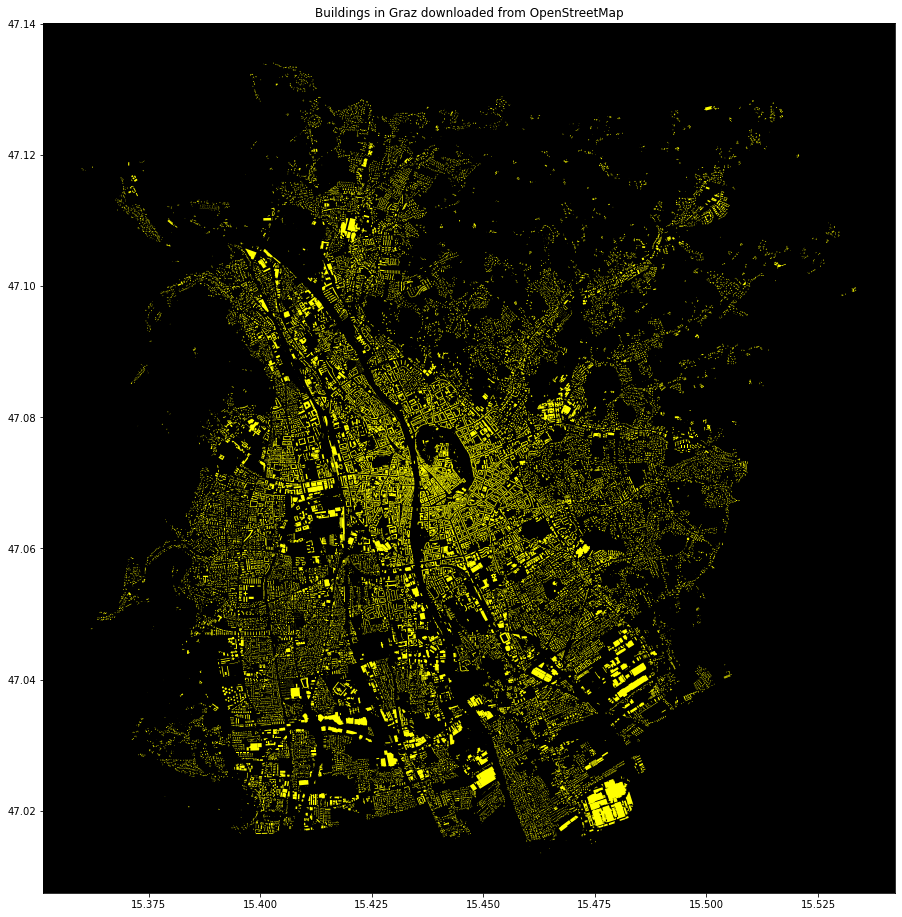

In [81]:
ax = building_gdf_new.plot(figsize=(16,16),color="yellow")
ax.set_facecolor("black") # better visibility
ax.set_title("Buildings in Graz downloaded from OpenStreetMap")


In [13]:

bus_stop_gdf_new_reprojected = bus_stop_gdf_new.copy(True)
building_gdf_new_reprojected = building_gdf_new.copy(True)
building_gdf_new_reprojected.drop_duplicates(subset=['geometry'])
bus_stop_gdf_new_reprojected.geometry = bus_stop_gdf_new_reprojected.geometry.to_crs("EPSG:32633")
building_gdf_new_reprojected.geometry = building_gdf_new_reprojected.geometry.to_crs("EPSG:32633")

print("Old Coordinates: ",bus_stop_gdf_new.geometry[0])
print("New Coordinates: ",bus_stop_gdf_new_reprojected.geometry[0])

Old Coordinates:  POINT (15.4175789 47.0728206)
New Coordinates:  POINT (531703.4971396916 5213341.044780113)


In [14]:
# I made my own polygon class to compute the centroids
# but it does not support multypolygons and polygons with holes
instances_mypolygon = []
instances_shapely_polygon = []
for geom in building_gdf_new_reprojected.geometry:
    try:
        poly = mygeom.Polygon.from_wkt(geom.wkt)
        instances_mypolygon.append(poly)
    except Exception as e:
        instances_shapely_polygon.append(geom)
        continue

print(f"Instances of my own Polygon Type: {len(instances_mypolygon)}",f"|| Instances of  Shapely-Polygon Type: {len(instances_shapely_polygon)}")

Instances of my own Polygon Type: 60669 || Instances of  Shapely-Polygon Type: 216


In [15]:
centroids_by_my_polygon = [poly.centroid() for poly in instances_mypolygon]
centroids_by_shapely = [poly.centroid for poly in instances_shapely_polygon]

Text(0.5, 1.0, 'Computed Centroids')

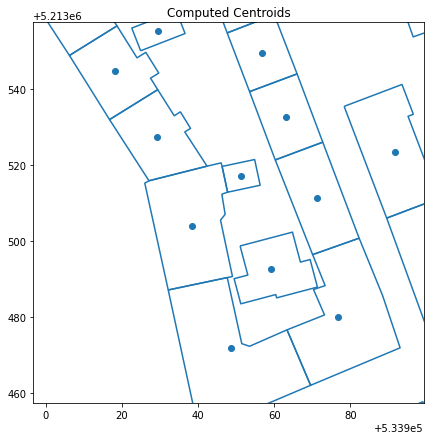

In [29]:
coors_mypolygon_class = np.array([[p.x,p.y] for p in centroids_by_my_polygon ])
ax = gpd.GeoSeries([geometry.Point(i) for i in coors_mypolygon_class]).plot(figsize=(7,7))
building_gdf_new_reprojected.boundary.plot(ax=ax)
center_x = coors_mypolygon_class[:,0].min() + coors_mypolygon_class[:,0].max()
center_y = coors_mypolygon_class[:,1].min() + coors_mypolygon_class[:,1].max()
center_x /= 2
center_y /= 2
ax.axis('equal')
ax.set_xlim(center_x,center_x+100)
ax.set_ylim(center_y,center_y+100)
ax.set_title("Computed Centroids")

In [17]:
building_centroids = np.concatenate([coors_mypolygon_class, np.array([[p.x,p.y] for p in centroids_by_shapely])])
print("Total number of buildings: ",len(building_centroids))

Total number of buildings:  60885


In [18]:
bus_station_points = np.array([[coor.x,coor.y] for coor in bus_stop_gdf_new_reprojected.geometry])
bus_station_pointcloud = Pointcloud(bus_station_points[:,0], bus_station_points[:,1])

building_pointcloud = Pointcloud(building_centroids[:,0], building_centroids[:,1])

In [19]:
with Timer("Execution time buildings and bus-stations, brutal-force:"):
    nearest_bus_stations_bf = building_pointcloud.k_nearest_neighbour_bf(bus_station_pointcloud)
    
with Timer("Execution time buildings and bus-stations, kd-tree:"):
    nearest_bus_station_knn = building_pointcloud.k_nearest_neighbour_kdtree(bus_station_pointcloud)

Execution time buildings and bus-stations, brutal-force: 171253.749 [μs]
Execution time buildings and bus-stations, kd-tree: 6909.282 [μs]


In [20]:
assert nearest_bus_station_knn == nearest_bus_stations_bf

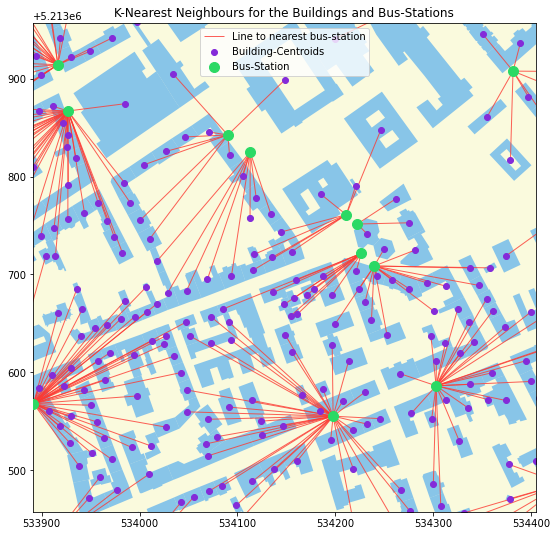

In [88]:
# for plotting compute center of all buildings and bus-stops
center_x = min(building_centroids[:,0].min(), bus_station_points[:,0].min() ) + max(building_centroids[:,0].max(), bus_station_points[:,0].min())
center_y = min(building_centroids[:,1].min(), bus_station_points[:,1].min() ) + max(building_centroids[:,1].max(), bus_station_points[:,1].min())
center_x /= 2
center_y /= 2

# bounds of the plot
xmin = center_x
xmax = center_x + 500
ymin = center_y
ymax = center_y + 500

# bounds of the features, they are larger as the plot bounds
# because otherwise not all points will be connected
xmin_filter = xmin - 100
xmax_filter = xmax + 100
ymin_filter = ymin - 100
ymax_filter = ymax + 100

# filter out the shapes that are not inside the shape bounding box
# rendering takes to long if I skip this
filtered_building_centroids = gpd.GeoSeries([geometry.Point(i) for i in building_centroids]).cx[xmin_filter:xmax_filter,ymin_filter:ymax_filter]
filtered_bus_stations = gpd.GeoSeries([geometry.Point(i) for i in bus_station_points]).cx[xmin_filter:xmax_filter,ymin_filter:ymax_filter]
filtered_building_polygons = building_gdf_new_reprojected.cx[xmin_filter:xmax_filter,ymin_filter:ymax_filter]

filtered_connections = gpd.GeoSeries([geometry.LineString([[p1.x,p1.y],[p2.x,p2.y]]) for (p1,p2) in zip(building_pointcloud, nearest_bus_station_knn)])
filtered_connections = filtered_connections.cx[xmin_filter:xmax_filter,ymin_filter:ymax_filter]

# plot the results
fig, ax = plt.subplots(figsize=(9,9))
ax.axis('equal')
filtered_building_polygons.plot(ax=ax,color="#3CA2F0",alpha=0.6,zorder=0,label="Buildings")
filtered_connections.plot(ax=ax,color="black",linewidth=1,zorder=1,alpha=0.8,label="Line to nearest bus-station")
filtered_building_centroids.plot(ax=ax,color="#FC3932",zorder=2, label="Building-Centroids")
filtered_bus_stations.plot(ax=ax,color="#2BD964",markersize=100,zorder=3, label="Bus-Station")
ax.set_facecolor("#FAFADD")
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.set_title("K-Nearest Neighbours for the Buildings and Bus-Stations")
plt.legend()